# Prophet Project

## 0. Imports

### 0.1. Libraries

In [1]:
# Data Manipulation
import pandas               as pd
import numpy                as np

# Data Visualisation
import seaborn              as sns
import matplotlib           as mpl
import matplotlib.pyplot    as plt
import matplotlib.dates     as mdates

# Prophet
import pystan

from prophet                import Prophet
from prophet.plot           import add_changepoints_to_plot
from prophet.plot           import plot_yearly
from prophet.plot           import plot_cross_validation_metric
from prophet.diagnostics    import cross_validation, performance_metrics

# Other 
import warnings
import logging

from itertools              import product

c:\Users\caiop\anaconda3\envs\time_series_9\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
ERROR:prophet.plot:Importing plotly failed. Interactive plots will not work.


### 0.2. Settings

In [2]:
# Ignoring warnings
warnings.filterwarnings('ignore')

# Pandas Settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

# Visualization Settings
%matplotlib inline

# Set a style
mpl.style.use('ggplot')  # Other options: 'default', 'seaborn', 'bmh', 'dark_background'

# Customize rcParams
mpl.rcParams.update({
    'figure.titlesize': 24,
    'figure.figsize': (18, 6),
    'figure.dpi': 150,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'axes.facecolor': 'white',
    'axes.linewidth': 1,
    'axes.grid': True,
    'xtick.labelsize': 12,
    'xtick.bottom': False,
    'ytick.labelsize': 12,
    'ytick.left': False,
    'legend.fontsize': 12,
    'lines.linewidth': 2,
    'lines.markersize': 6,
    'grid.color': 'lightgray',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'font.size': 12,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial']
})

# Set a color palette
color_palette = ['#023047', '#e85d04', '#0077b6', '#ff8200', '#0096c7', '#ff9c33']
sns.set_palette(sns.color_palette(color_palette)) 

### 0.3. Functions

In [37]:
def set_plot(fig, title, xlabel, ylabel):
    """
    Summary: This function sets the plot configuration for the initial plots. 
    Args:
        fig: the figure object.
        title: the title of the plot.
        xlabel: the label for the x axis.
        ylabel: the label for the y axis.
    Returns: figure with the image configuration.
    """
    # Customizing
    fig.set_title(title)
    fig.set_xlabel(xlabel, color='black')
    fig.set_ylabel(ylabel, color='black')

    return fig

### 0.4. Dataset

In [3]:
df = pd.read_csv('../data/raw/portland-oregon-average-monthly-.csv')

## 1. Data Description

In [4]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column                                                                                      Non-Null Count  Dtype 
---  ------                                                                                      --------------  ----- 
 0   Month                                                                                       114 non-null    object
 1   Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114  114 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ KB


,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630
...,...,...
109,1969-02,1425
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114",114.00,1120.54,270.89,613.00,885.00,1158.00,1340.00,1558.00


## 2. Data Exploration and Preprocessing

In [10]:
df = df.rename(columns = {
    'Month': 'ds', 
    'Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114': 'y'})

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


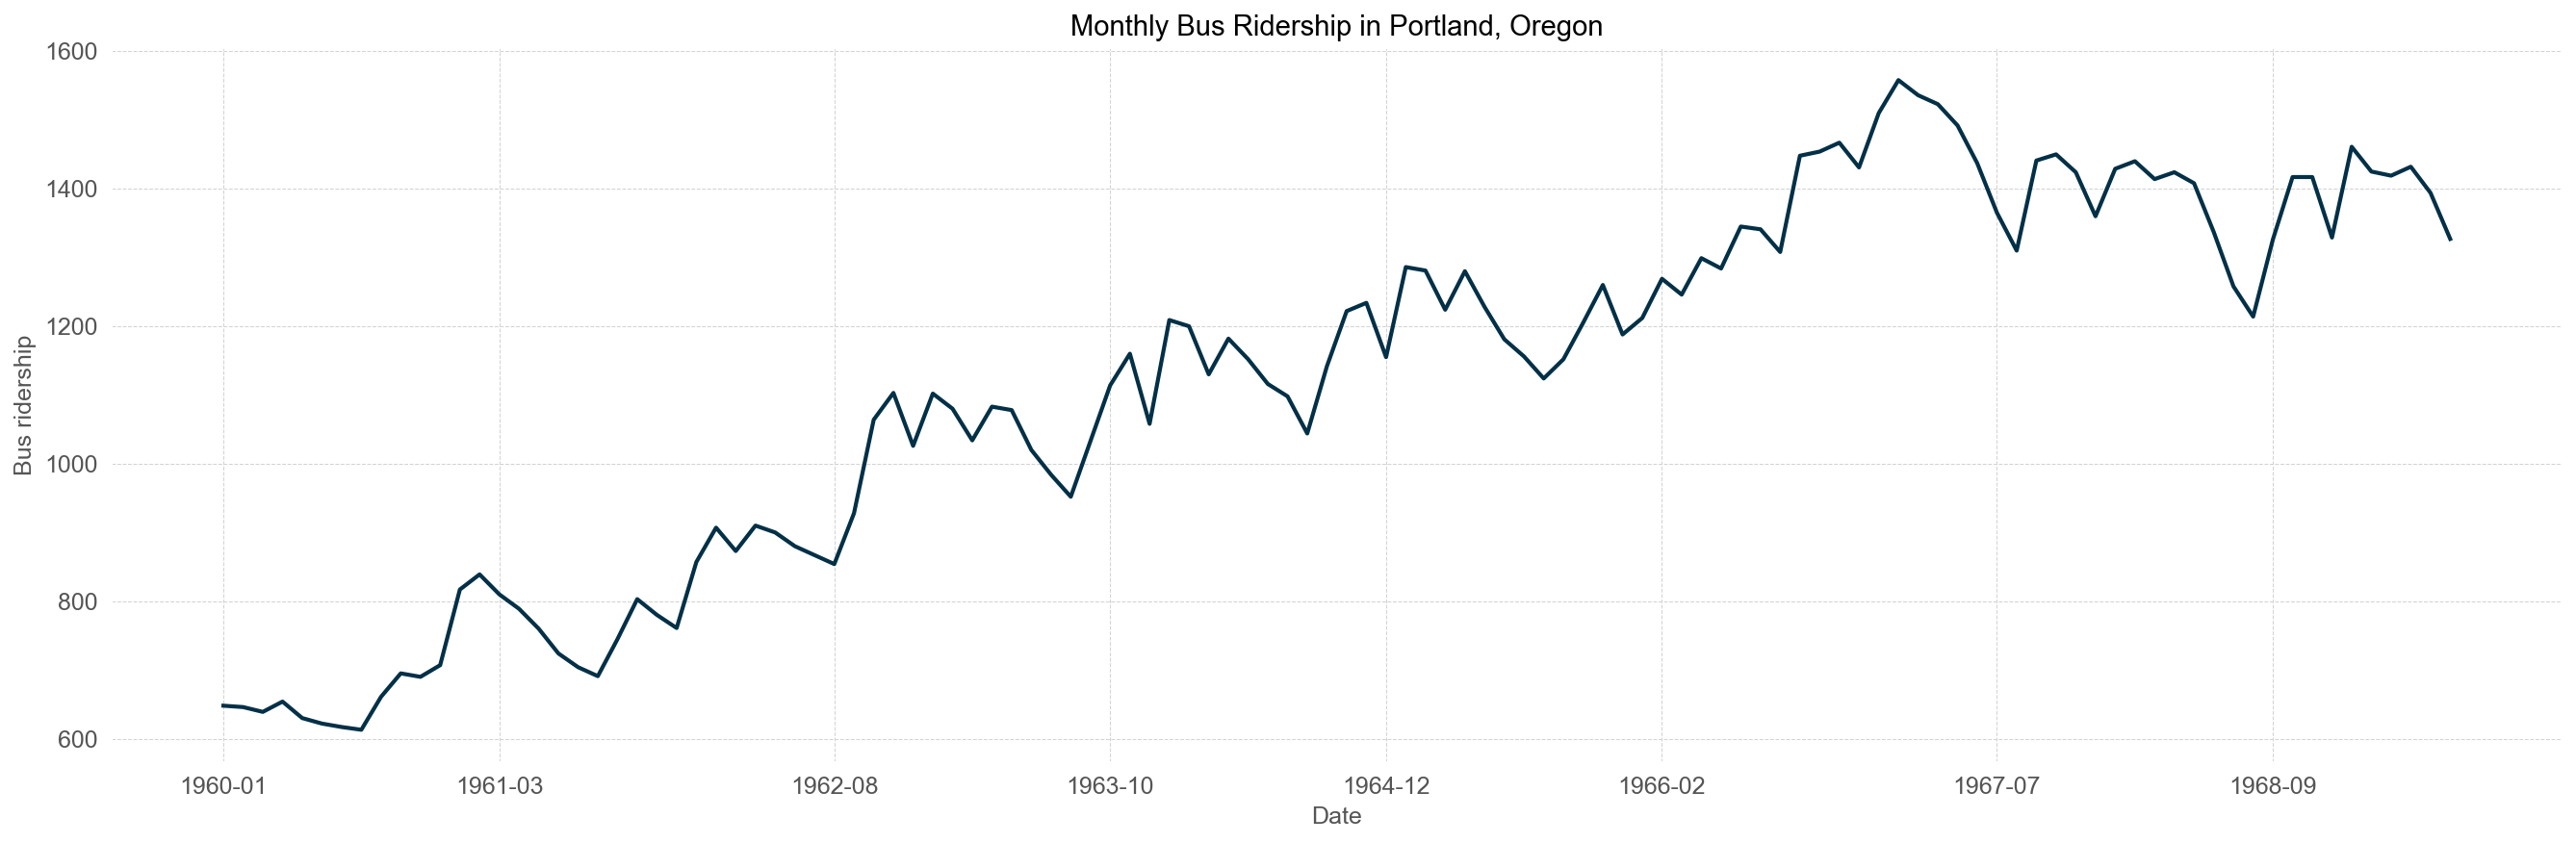

In [13]:
fig, ax = plt.subplots()

locator = mdates.AutoDateLocator()

ax.plot(df.ds, df.y)

ax.xaxis.set_major_locator(locator)

ax.set_xlabel('Date')
ax.set_ylabel('Bus ridership')
ax.set_title('Monthly Bus Ridership in Portland, Oregon')

plt.tight_layout()

plt.show()

In [28]:
df_datetime = df.copy()
df_datetime['ds'] = pd.to_datetime(df_datetime['ds'])

df_datetime.set_index('ds', inplace=True)

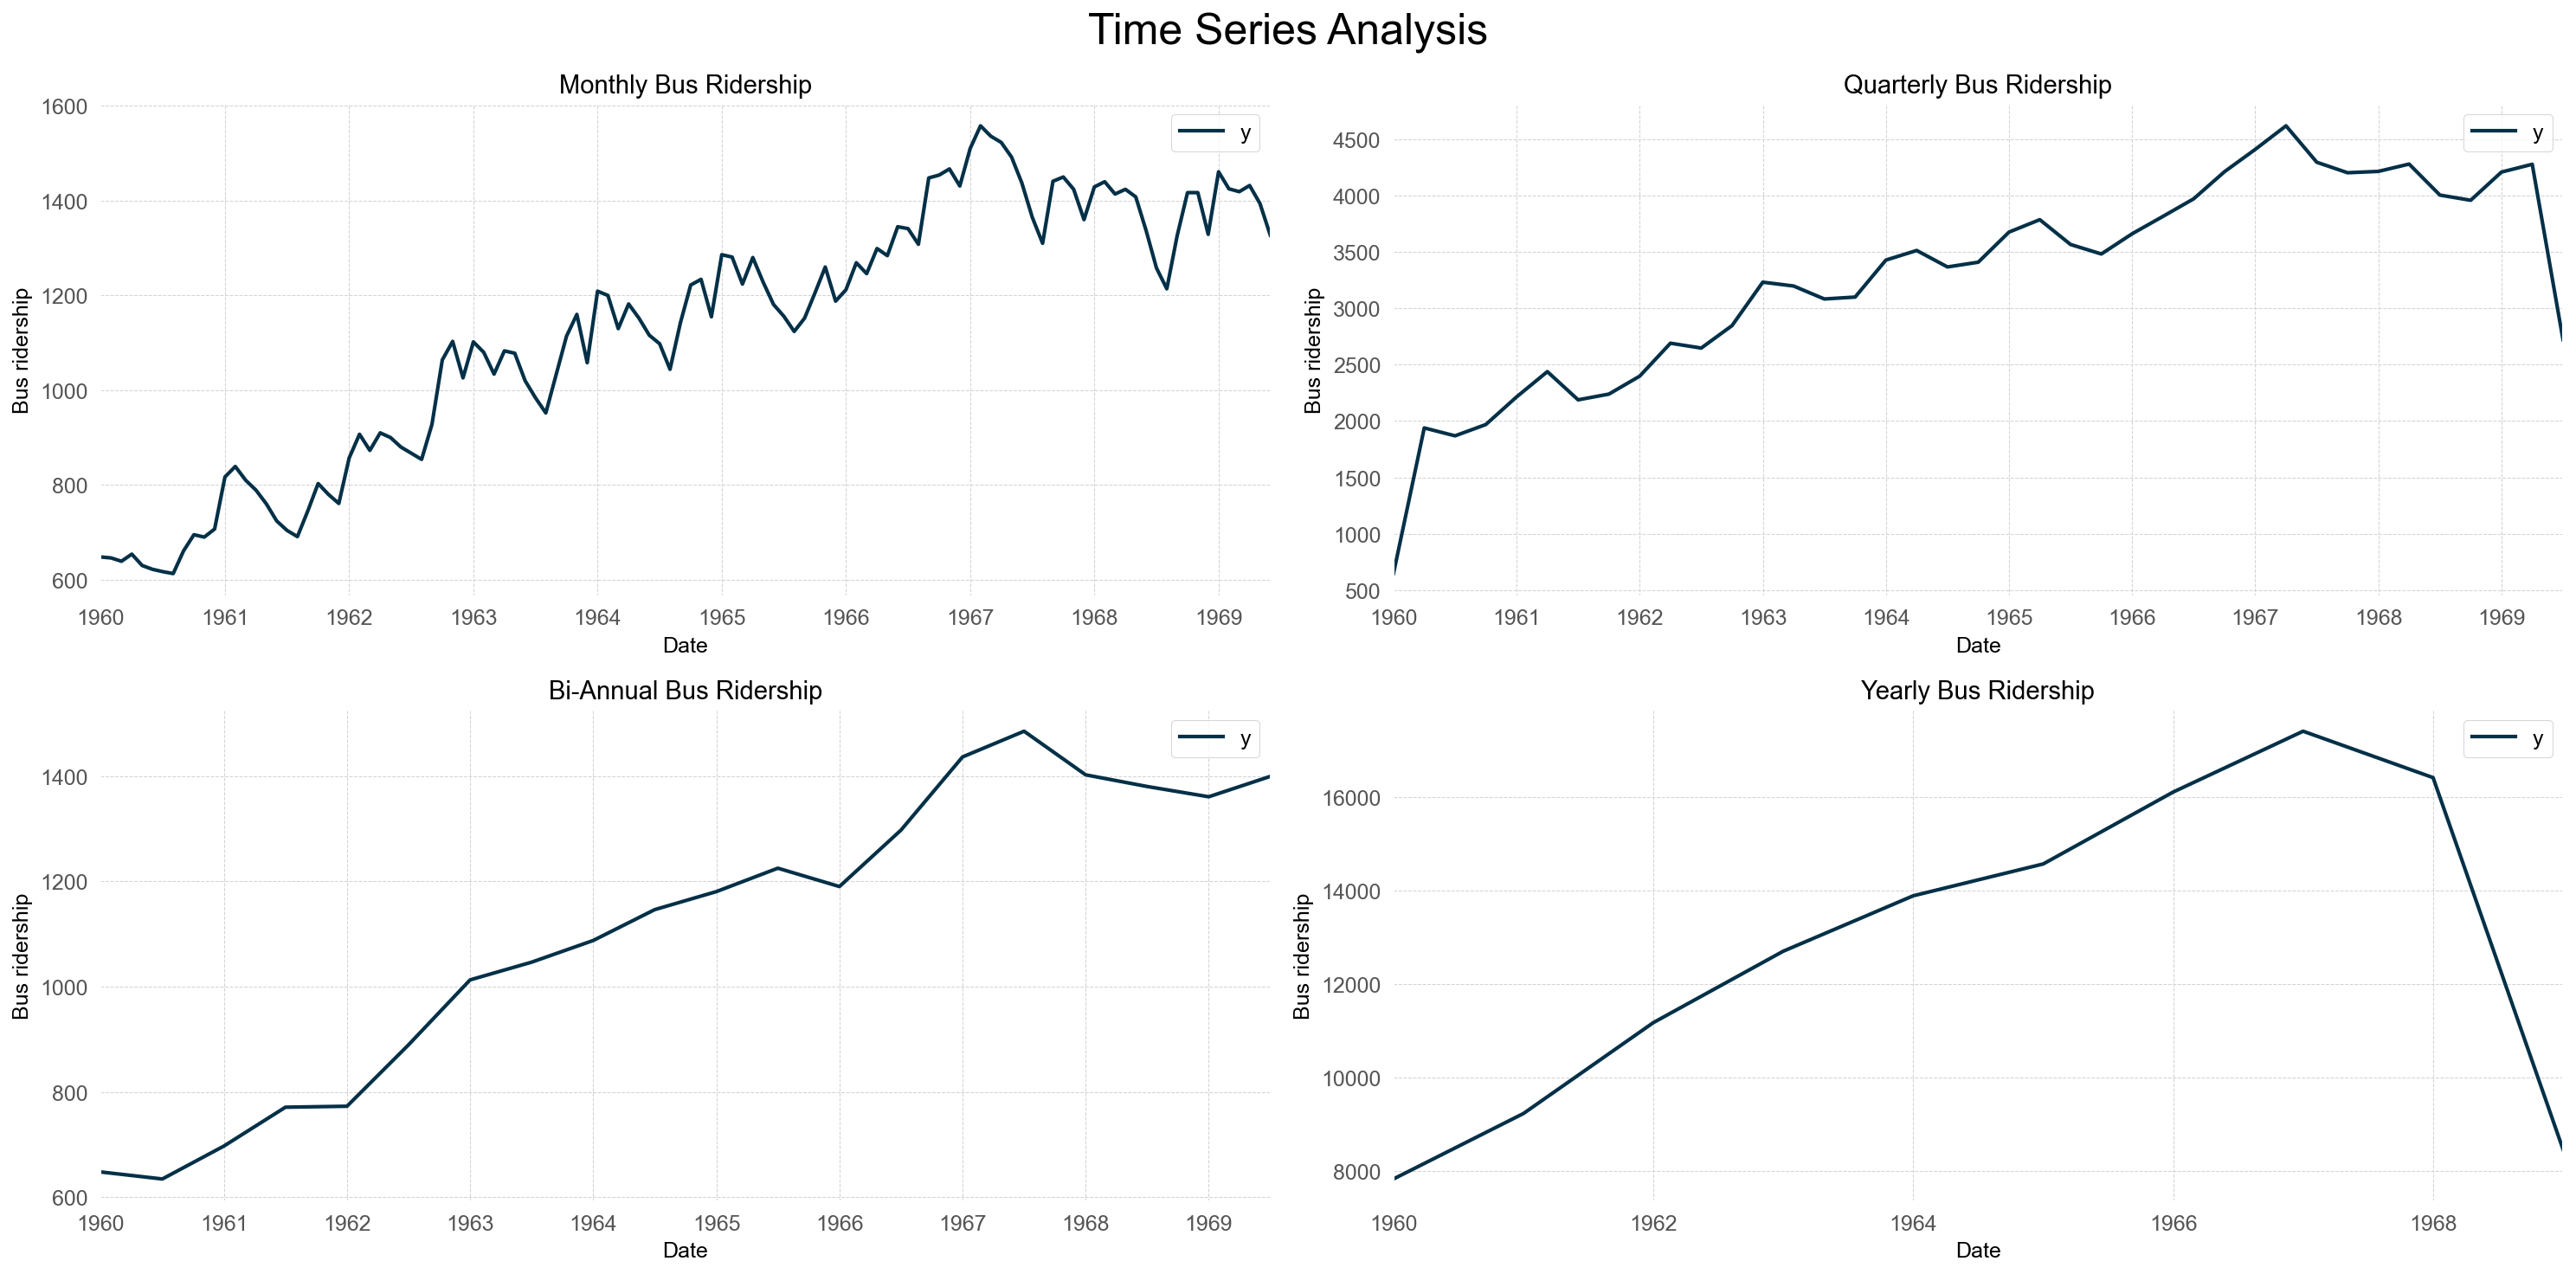

In [38]:
# Creating Figure
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes = axes.flatten()

# Plot 1
ax1 = axes[0]
df_datetime.plot(ax=ax1)
set_plot(ax1, 'Monthly Bus Ridership', 'Date', 'Bus ridership')

# Plot 2
ax2 = axes[1]
df_datetime.resample('3M').sum().plot(ax=ax2)
set_plot(ax2, 'Quarterly Bus Ridership', 'Date', 'Bus ridership')

# Plot 3
ax3 = axes[2]
df_datetime.resample('6M').mean().plot(ax=ax3)
set_plot(ax3, 'Bi-Annual Bus Ridership', 'Date', 'Bus ridership')

# Plot 4
ax4 = axes[3]
df_datetime.resample('Y').sum().plot(ax=ax4)
set_plot(ax4, 'Yearly Bus Ridership', 'Date', 'Bus ridership')

# Main title
plt.suptitle('Time Series Analysis')

# Adjust spacing between subplots
plt.tight_layout()

## 3. Running Prophet

### 3.1. Grid Search

In [25]:
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    # 'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],
    # 'seasonality_mode': ['additive','multiplicative']
}

all_params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

rmses = []

cutoffs = pd.date_range(start='1963-01-01', end='1968-06-01', freq='6MS')

for params in all_params:
    m = Prophet(**params)
    m.add_country_holidays(country_name='US')
    m.fit(df)

    df_cv = cross_validation(model=m, horizon='365 days', cutoffs=cutoffs)
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: C:\Users\caiop\AppData\Local\Temp\tmpbsawl3u1\n_170coa.json
DEBUG:cmdstanpy:input tempfile: C:\Users\caiop\AppData\Local\Temp\tmpbsawl3u1\0s4k1sv5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\caiop\\anaconda3\\envs\\time_series_9\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=40518', 'data', 'file=C:\\Users\\caiop\\AppData\\Local\\Temp\\tmpbsawl3u1\\n_170coa.json', 'init=C:\\Users\\caiop\\AppData\\Local\\Temp\\tmpbsawl3u1\\0s4k1sv5.json', 'output', 'file=C:\\Users\\caiop\\AppData\\Local\\Temp\\tmpbsawl3u1\\prophet_modelw7orcqqa\\prophet_model-20240821195512

### 3.2. Best Model

In [27]:
best_params = all_params[np.argmin(rmses)]

print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1}


### 3.3. Fit best model 

In [40]:
m = Prophet(
    changepoint_prior_scale=0.001,
    seasonality_prior_scale=0.1
)

m.add_country_holidays(country_name='US')
m.fit(df)

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: C:\Users\caiop\AppData\Local\Temp\tmpbsawl3u1\dhe_2buu.json
DEBUG:cmdstanpy:input tempfile: C:\Users\caiop\AppData\Local\Temp\tmpbsawl3u1\jihltucb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\caiop\\anaconda3\\envs\\time_series_9\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=68493', 'data', 'file=C:\\Users\\caiop\\AppData\\Local\\Temp\\tmpbsawl3u1\\dhe_2buu.json', 'init=C:\\Users\\caiop\\AppData\\Local\\Temp\\tmpbsawl3u1\\jihltucb.json', 'output', 'file=C:\\Users\\caiop\\AppData\\Local\\Temp\\tmpbsawl3u1\\prophet_modelkwlvjce0\\prophet_model-20240821201752

### 3.4. Make forecast with best model

In [41]:
future = m.make_future_dataframe(periods=12, freq='M')
future.tail()

,ds
121,1970-01-31
122,1970-02-28
123,1970-03-31
124,1970-04-30
125,1970-05-31


In [42]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
121,1970-01-31,1657.76,1546.46,1771.35
122,1970-02-28,1648.26,1537.79,1756.10
123,1970-03-31,1668.63,1561.23,1773.85
124,1970-04-30,1640.37,1542.39,1744.81
125,1970-05-31,1605.07,1500.77,1717.28


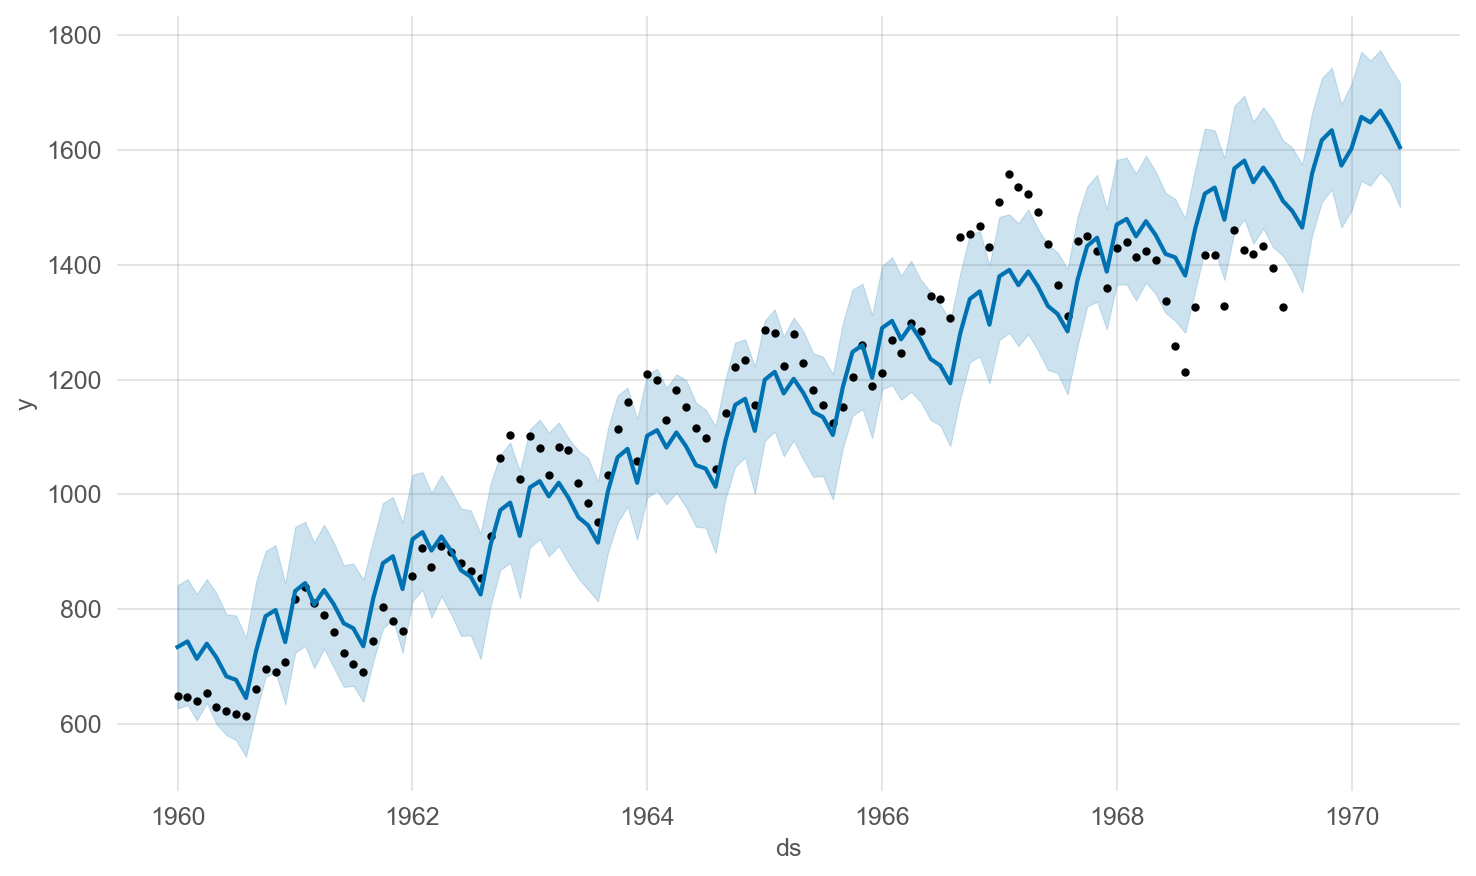

In [43]:
forecast_fig = m.plot(forecast)

### 3.5. Components of the forecast

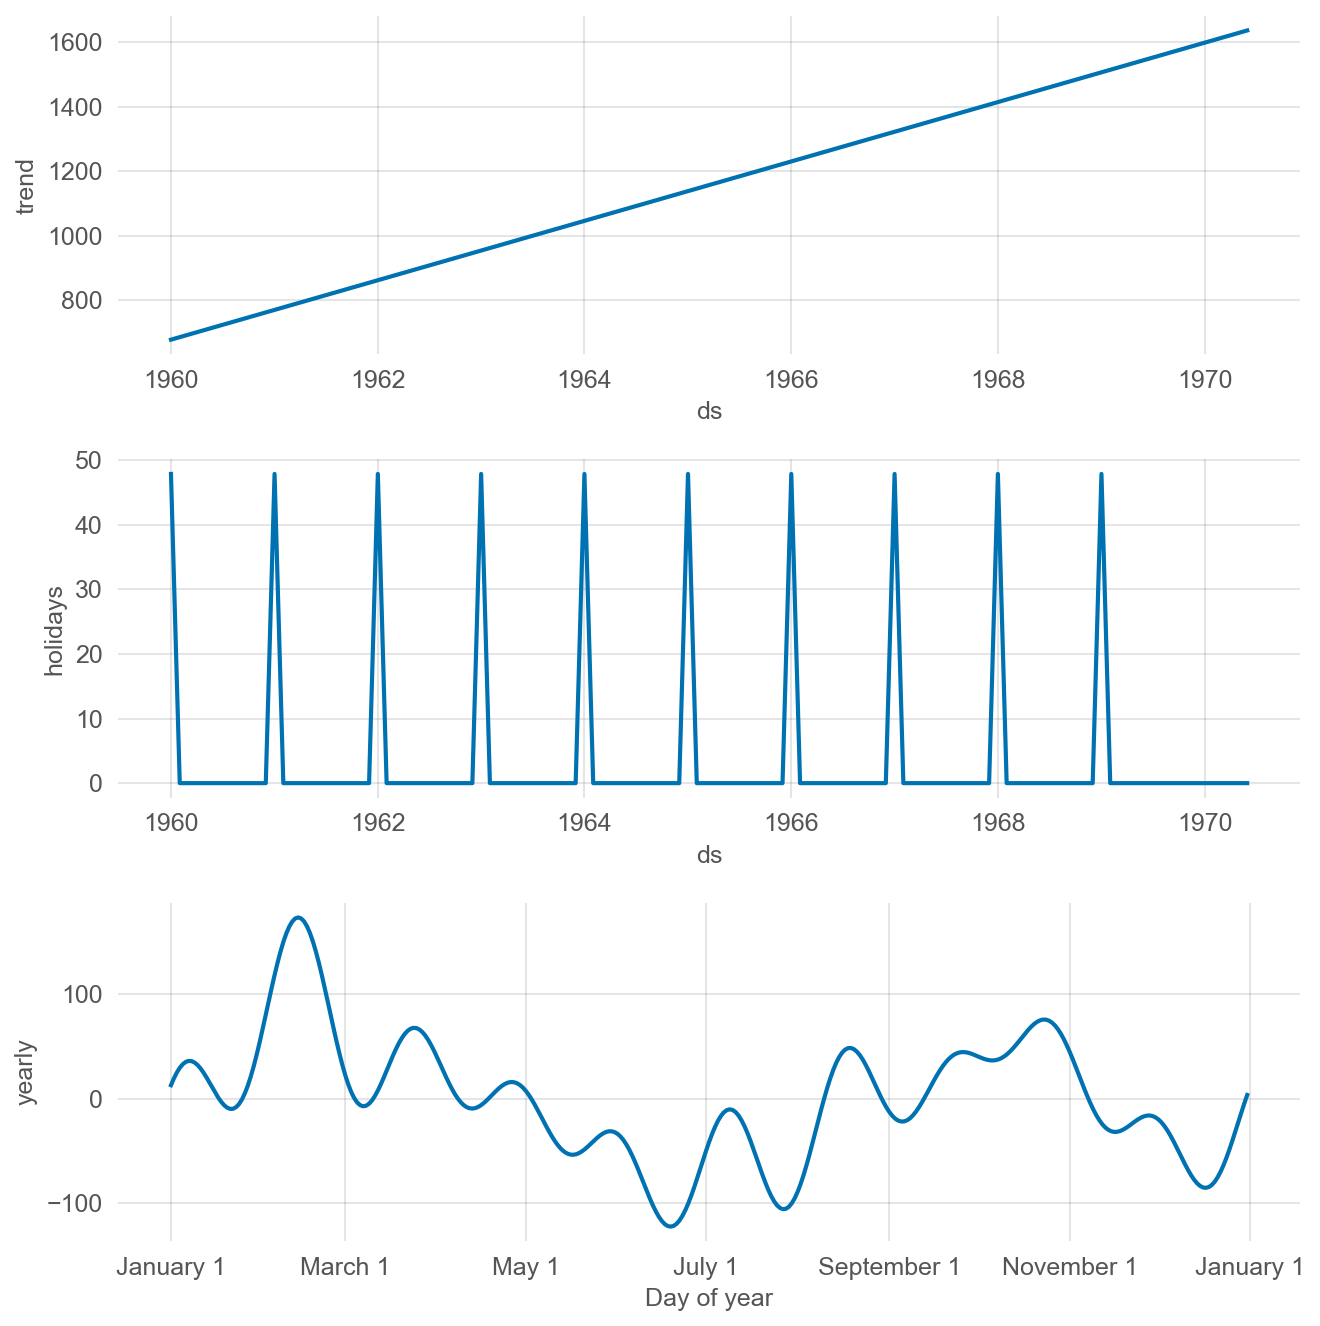

In [44]:
components_fig = m.plot_components(forecast)

## 4. Performance metrics 

In [46]:
df_cv = cross_validation(model=m, horizon='365 days', cutoffs=cutoffs)
df_p = performance_metrics(df_cv)

  0%|          | 0/11 [00:00<?, ?it/s]DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\caiop\AppData\Local\Temp\tmpbsawl3u1\uzmc7bfa.json
DEBUG:cmdstanpy:input tempfile: C:\Users\caiop\AppData\Local\Temp\tmpbsawl3u1\3rhcou7r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\caiop\\anaconda3\\envs\\time_series_9\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=4263', 'data', 'file=C:\\Users\\caiop\\AppData\\Local\\Temp\\tmpbsawl3u1\\uzmc7bfa.json', 'init=C:\\Users\\caiop\\AppData\\Local\\Temp\\tmpbsawl3u1\\3rhcou7r.json', 'output', 'file=C:\\Users\\caiop\\AppData\\Local\\Temp\\tmpbsawl3u1\\prophet_modelyimqoesn\\prophet_model-20240821202205.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:22:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:22:

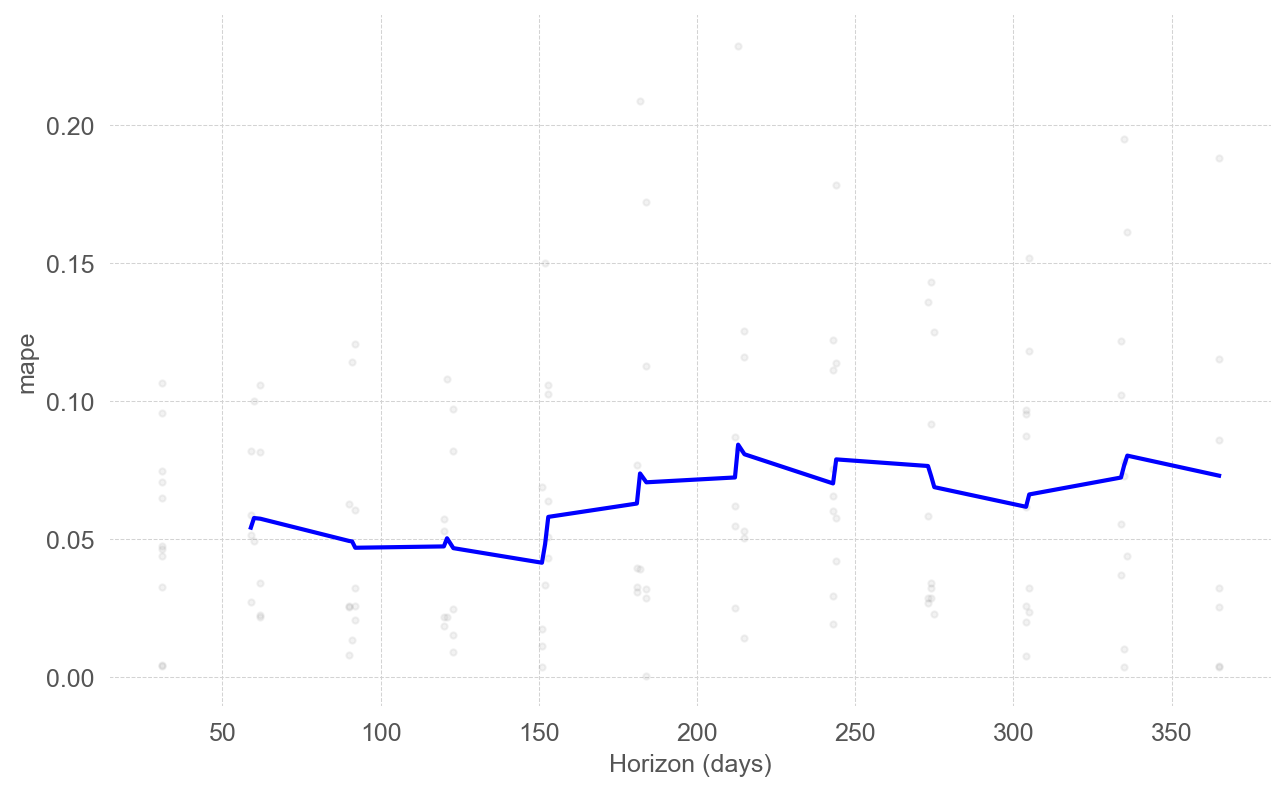

In [47]:
fig = plot_cross_validation_metric(df_cv, metric='mape')